# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Expérience ObsInfo2307
### Analyse des résultats

---

# Imports

In [1]:
cd ../..

/Volumes/Geek/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

# Chargement Données

In [3]:
import patat.util.gsheet

gs = patat.util.gsheet.GoogleSheet()

sheet_id = '1KOACo0zR52LZuT2wMSc2a4_vePWC5K2RAyw_0x2Hvjw'
range_name = 'Data'

df_obsinfo = gs.read_df(sheet_id,range_name)

In [4]:
labels = [
    'infox',
    'lieux, dates et personnes',
    'faits',
    'opinions',
    'subjectif',
    'propos rapporté',
    'sources citées',
    'fausse nouvelle',
    'insinuation',
    'exagération',
    'titre décalé',
]

In [5]:
import numpy as np

In [6]:
def normalize(x):
    if x == '0':
        return 0.0
    elif x== '1':
        return 1.0
    else:
        return np.NaN

In [7]:
for label in labels:
    df_obsinfo[label]=df_obsinfo[label].apply(normalize)

In [8]:
df_obsinfo['url_h'] = df_obsinfo['url_labelizer'].apply(lambda s: s[-40:])

# Kappa de Fleiss

## Calcul par label

In [9]:
label = 'infox'

## Agrégation des données

In [12]:
def count_0(label_series):
    return len (label_series[label_series==0])

In [13]:
def count_1(label_series):
    return len (label_series[label_series==1])

In [14]:
count_1(df_obsinfo['infox'])

337

In [15]:
df_agg1 = df_obsinfo.pivot_table(index='title',values=labels,aggfunc=count_1)
df_agg1

,exagération,faits,fausse nouvelle,infox,insinuation,"lieux, dates et personnes",opinions,propos rapporté,sources citées,subjectif,titre décalé
title,,,,,,,,,,,
"""On ne peut plus accepter ces mensonges d'État"" Christian Perronne",8,9,6,9,6,9,9,4,8,9,1
"""Tully"": Charlize Theron super-maman (critique)",0,8,0,0,0,7,9,2,5,3,0
24 juillet : nouvelles manifestations nationales contre le passe sanitaire,4,9,1,2,5,9,8,2,4,8,0
"70 000 personnes manifestent à Prague contre le gouvernement tchèque, l’UE et l’OTAN",0,9,0,0,1,9,3,2,8,0,0
"Affluence en baisse au Carnaval de Nice, sept mois après un attentat très meurtrier",1,9,0,1,1,9,4,2,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...
"[Entretien exclusif] Helen Joyce : « Aujourd’hui, on demande aux enseignants d’apprendre aux enfants ce que signifie être un garçon ou une fille en les faisant se questionner sur leur identité de genre »",5,8,3,5,5,7,9,9,3,6,1
"[Tribune] En pleine affaire Ocean Viking, le passeur Cédric Herrou va rencontrer des lycéens !",8,9,3,3,4,9,9,1,6,9,1
"« Grand remplacement », « Français de papier »… Pécresse manque d’idées et pioche dans les idées de « l’extrême droite »",7,9,1,2,5,8,9,4,8,9,0


In [16]:
df_agg0 = df_obsinfo.pivot_table(index='title',values=labels,aggfunc=count_0)
df_agg0

,exagération,faits,fausse nouvelle,infox,insinuation,"lieux, dates et personnes",opinions,propos rapporté,sources citées,subjectif,titre décalé
title,,,,,,,,,,,
"""On ne peut plus accepter ces mensonges d'État"" Christian Perronne",1,0,3,0,3,0,0,5,1,0,8
"""Tully"": Charlize Theron super-maman (critique)",9,1,9,9,9,2,0,7,4,6,9
24 juillet : nouvelles manifestations nationales contre le passe sanitaire,5,0,8,7,4,0,1,7,5,1,9
"70 000 personnes manifestent à Prague contre le gouvernement tchèque, l’UE et l’OTAN",9,0,9,9,8,0,6,7,1,9,9
"Affluence en baisse au Carnaval de Nice, sept mois après un attentat très meurtrier",8,0,9,8,8,0,5,7,3,9,9
...,...,...,...,...,...,...,...,...,...,...,...
"[Entretien exclusif] Helen Joyce : « Aujourd’hui, on demande aux enseignants d’apprendre aux enfants ce que signifie être un garçon ou une fille en les faisant se questionner sur leur identité de genre »",4,1,6,4,4,2,0,0,6,3,8
"[Tribune] En pleine affaire Ocean Viking, le passeur Cédric Herrou va rencontrer des lycéens !",1,0,6,6,5,0,0,8,3,0,8
"« Grand remplacement », « Français de papier »… Pécresse manque d’idées et pioche dans les idées de « l’extrême droite »",2,0,8,7,4,1,0,5,1,0,9


In [17]:
pd.concat([df_agg0,df_agg1],axis=1)

,exagération,faits,fausse nouvelle,infox,insinuation,"lieux, dates et personnes",opinions,propos rapporté,sources citées,subjectif,...,faits,fausse nouvelle,infox,insinuation,"lieux, dates et personnes",opinions,propos rapporté,sources citées,subjectif,titre décalé
title,,,,,,,,,,,,,,,,,,,,,
"""On ne peut plus accepter ces mensonges d'État"" Christian Perronne",1,0,3,0,3,0,0,5,1,0,...,9,6,9,6,9,9,4,8,9,1
"""Tully"": Charlize Theron super-maman (critique)",9,1,9,9,9,2,0,7,4,6,...,8,0,0,0,7,9,2,5,3,0
24 juillet : nouvelles manifestations nationales contre le passe sanitaire,5,0,8,7,4,0,1,7,5,1,...,9,1,2,5,9,8,2,4,8,0
"70 000 personnes manifestent à Prague contre le gouvernement tchèque, l’UE et l’OTAN",9,0,9,9,8,0,6,7,1,9,...,9,0,0,1,9,3,2,8,0,0
"Affluence en baisse au Carnaval de Nice, sept mois après un attentat très meurtrier",8,0,9,8,8,0,5,7,3,9,...,9,0,1,1,9,4,2,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"[Entretien exclusif] Helen Joyce : « Aujourd’hui, on demande aux enseignants d’apprendre aux enfants ce que signifie être un garçon ou une fille en les faisant se questionner sur leur identité de genre »",4,1,6,4,4,2,0,0,6,3,...,8,3,5,5,7,9,9,3,6,1
"[Tribune] En pleine affaire Ocean Viking, le passeur Cédric Herrou va rencontrer des lycéens !",1,0,6,6,5,0,0,8,3,0,...,9,3,3,4,9,9,1,6,9,1
"« Grand remplacement », « Français de papier »… Pécresse manque d’idées et pioche dans les idées de « l’extrême droite »",2,0,8,7,4,1,0,5,1,0,...,9,1,2,5,8,9,4,8,9,0


# Moyennes et accords

In [18]:
df_mean = df_obsinfo.pivot_table(index='title',values=labels,aggfunc='mean')

In [19]:
df_accord = df_mean.apply(lambda x : abs(2*x-1))

## Sommes des Moyennes

In [20]:
mean_sum = pd.DataFrame(df_mean.sum(),columns=['mean']).sort_values('mean')
mean_sum

,mean
titre décalé,9.694444
fausse nouvelle,22.194444
propos rapporté,29.777778
infox,37.444444
exagération,45.333333
insinuation,46.333333
subjectif,60.583333
sources citées,69.472222
opinions,72.930556
"lieux, dates et personnes",90.333333


<Axes: >

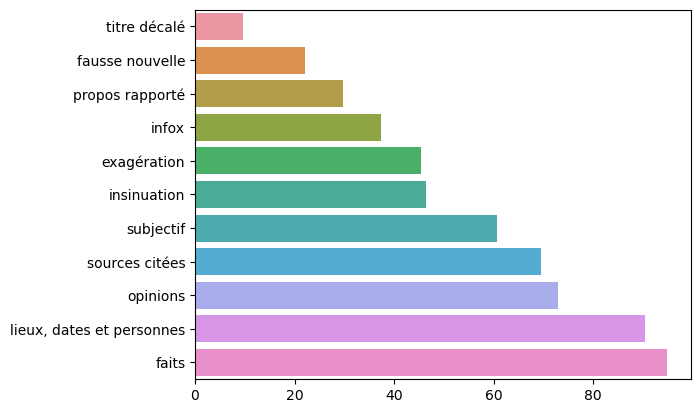

In [21]:
sns.barplot(mean_sum.T,orient="h")

### Constats
- Des labels souvent à 0 ou à 1 :
    - titre décalé : 10% de 1
    - fausse nouvelle : 23% de 1
    - Lieux dates et personnes : 94% de 1
    - faits : 95 %

## Sommes des Accords

In [ ]:
accord_sum = pd.DataFrame(df_accord.sum(),columns=['sum']).sort_values('sum')
accord_sum

In [ ]:
sns.barplot(accord_sum.T,orient="h")

## Comptage accords > seuil

In [ ]:
threshold = 0.75

In [ ]:
accord_count = pd.DataFrame(df_accord.apply(lambda x: x>=threshold).sum(),columns=['count']).sort_values('count')
accord_count

In [ ]:
sns.barplot(accord_count.T,orient="h")

## Polarité des accords

In [ ]:
df_accord_filter = df_accord.apply(lambda x: x>=threshold)

In [ ]:
polarities_data = {}
for index,row in df_accord_filter.iterrows():
    for col in row.keys():
        if row[col]:
            data = polarities_data.get(col,[])
            data.append(df_mean.loc[index,col])
            polarities_data[col]=data

In [ ]:
polarities = []
for label in polarities_data.keys():
    polarities.append({
        'label': label,
        'acc_count': len(polarities_data[label]),
        'acc_sum': sum(polarities_data[label]),
        'total_mean': mean_sum.loc[label]['mean']/100,
    })
df_polarities = pd.DataFrame(polarities)
df_polarities['polarity']=df_polarities['acc_sum']/df_polarities['acc_count']
df_polarities['pol_bias']=df_polarities['polarity']-df_polarities['total_mean']
df_polarities

In [ ]:
sns.barplot(df_polarities.sort_values('pol_bias'),y='label',x='pol_bias',)

### Constats
- Biais de polarité compris entre -0.14 et +0.17 
- Corrélation entre somme des moyennes et polarité des accords

### A calculer : Nombre d'accord par valeur 0/1, à comparer avec nombre moyen

# Comparaisons observateurs

In [ ]:
df_obs = df_obsinfo.pivot_table(index='observateur',aggfunc='sum')[labels]

In [ ]:
df_obs = df_obs.reset_index()

In [ ]:
df_obs

In [ ]:
sns.barplot(df_obs,x='observateur',y='infox')

In [ ]:
sns.barplot(df_obs,x='observateur',y='fausse nouvelle')

## Ecarts par label

In [ ]:
df_std = pd.DataFrame(df_obs[labels].std(),columns=['std']).sort_values('std')
df_std

In [ ]:
sns.barplot(df_std.T,orient='h')

# Prochaines étapes
---

- Nombre d'accord par valeur 0/1, à comparer avec nombre moyen
- Distance entre couples d'annotateurs
- Kappa de Fleiss
- Proposer un modele d'annotation de paragraphes

# Bricolages
---